In [1]:

# !pip install ipykernel

import os 

os.chdir('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main')
# from dataloaders.datasets.nyud_geonet import NYUD_GeoNet

from dataloaders.datasets.nyud2 import Nyud2
from dataloaders.datasets.nyud_geonet import *


import matplotlib.pyplot as plt
import numpy as np 
import cv2
import torchvision.transforms as transforms
from utils import  * 
from PIL import Image
import math
import torch.nn.functional as F
from plot.plot_main_pic import dilation
import copy


#* initial
# plt.rcParams['figure.figsize'] = (8.0, 2.0) # 设置figure_size尺寸
# plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
# plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400

import os.path as osp
from os.path import split,join,exists


Bad key text.latex.preview in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('s

0.png  is processing


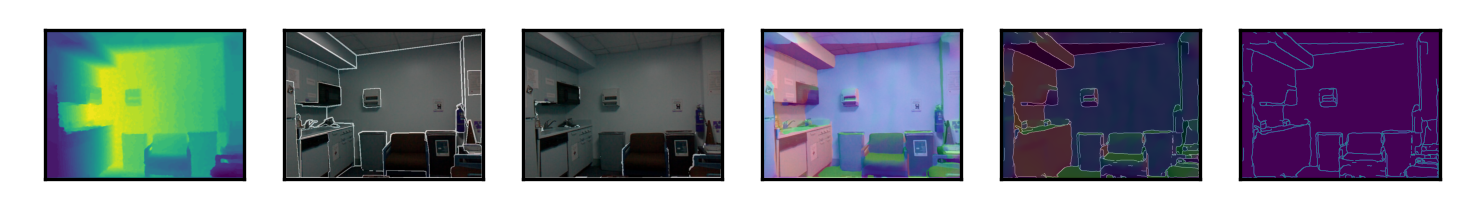

1.png  is processing


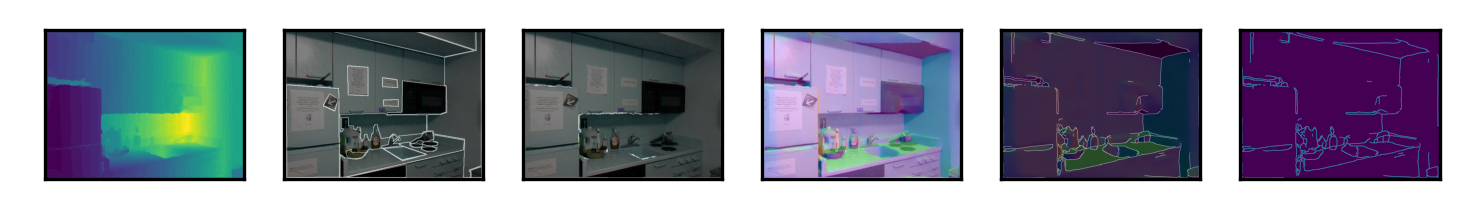

8.png  is processing


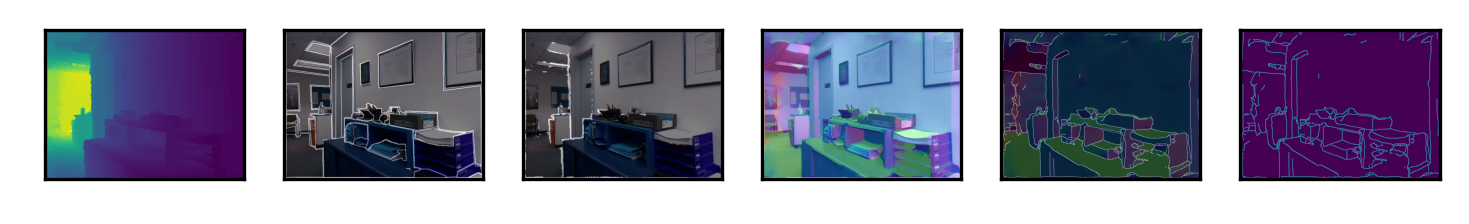

13.png  is processing


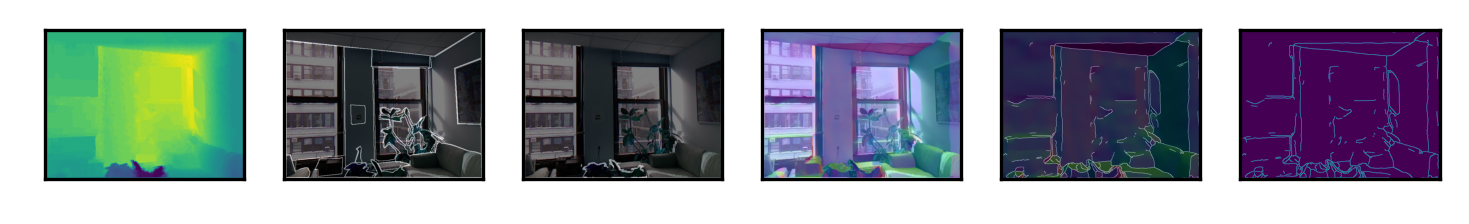

14.png  is processing


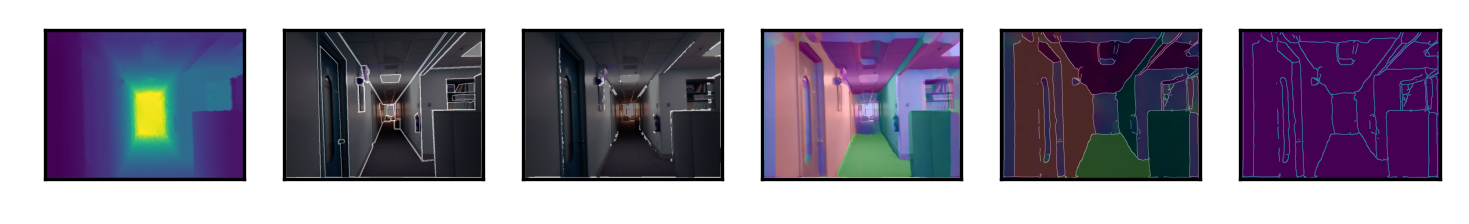

15.png  is processing


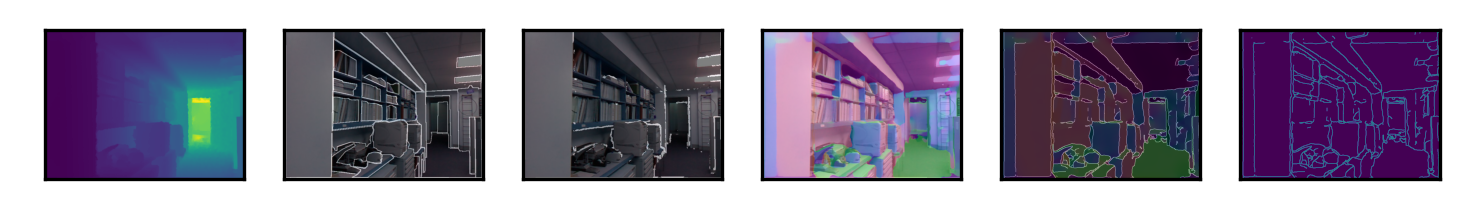

16.png  is processing


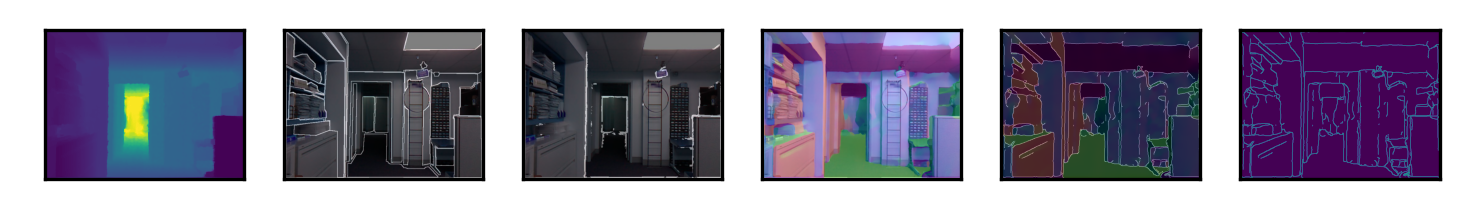

17.png  is processing


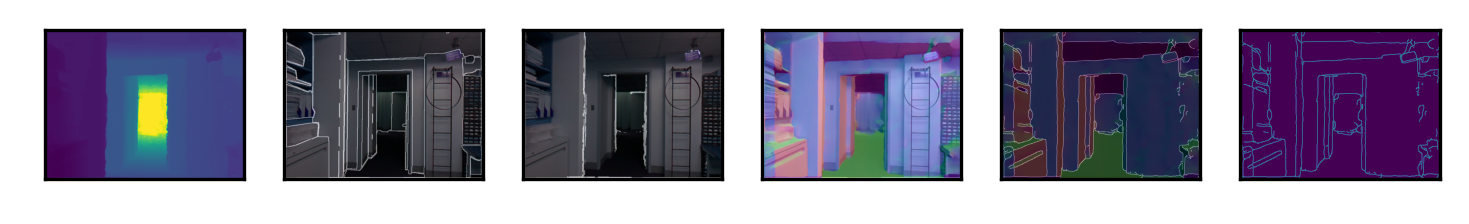

20.png  is processing


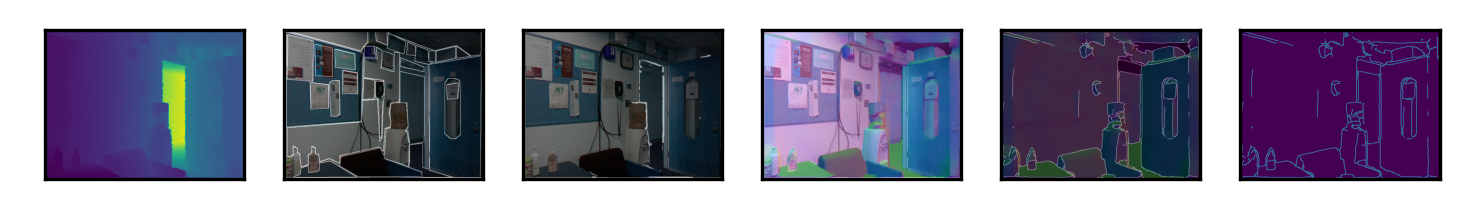

27.png  is processing


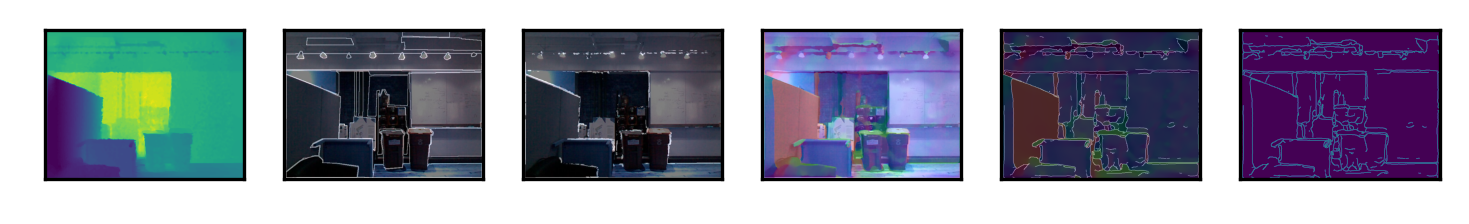

28.png  is processing


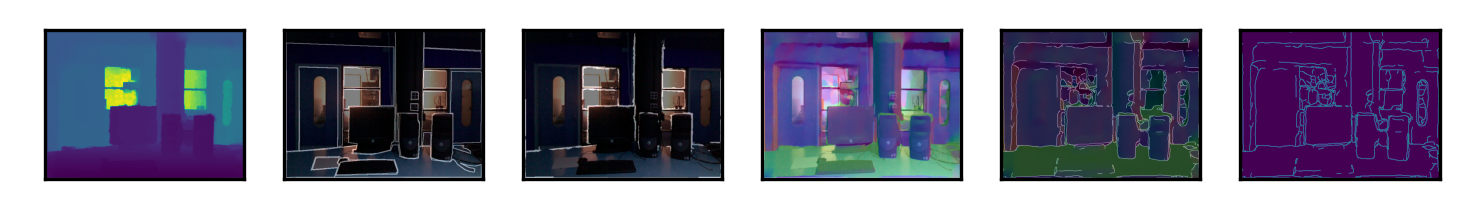

In [30]:
'''
Author: daniel
Date: 2023-02-10 15:02:26
LastEditTime: 2023-02-18 19:16:04
LastEditors: daniel
Description: 
FilePath: /Cerberus-main/jupyters/nyud21.ipynb
have a nice day
'''



def info(image):
    print(f'max value:{image.max()}, min value : {image.min()}, image shape: {image.shape}')



dataset= Nyud2()
# dataset2 = NYUD_GeoNet(split='val',root='/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/data/nyud2')

for idx,(im,depth,label,edge_map,depth_edge,normal_map,name) in enumerate(dataset):
    # sample,name = dataset2.__getitem__(idx)
    # print(len(sample))
    # info(sample['normals'])
    # info(sample['image'])
    
    
    # transpose
    print("===================================")
    print(f"{name}  is processing")
    # print(f"{type(im)}")
    # info(im)
    # info(depth)
    # info(label)
    # info(edge_map)
    # info(depth_edge)
    # info(normal_map)
    
    # label=transfer_label_to_mask(label)    
    # depth=normalize(depth)
    # show_imgs([merge_images(im,0.2,depth,0.8)],[0,0])
    # show_imgs([merge_images(im,0.2,label,0.8)],[0,0])
    # show_imgs([label],[0])
    
    # depth_edge = detect_edge(depth,10,50)
    #* 1. gen by edge map and local 5 X 5 depth value
    # edge_map= dilation(edge_map,2)
    # depth_edge[edge_map!=255]=0


    # normal_edge = detect_edge(normal_map,10,50)
    normal_edge = detect_edge(normal_map,100,150)
    #* 1. gen by edge map and local 5 X 5 depth value
    # edge_map= dilation(edge_map,25)
    # normal_edge[edge_map!=255]=0

    show_imgs([depth,
                merge_images(im,0.5,edge_map,0.5),
                merge_images(depth_edge,0.5,im,0.5),
                merge_images(im,0.5,normal_map,0.5),
                merge_images(normal_map,0.3,normal_edge,0.7),
                normal_edge
                ],
                [0,0,0,0,0,0],
                # ['origin depth',
                # 'origin origin img and origin edge',
                # 'origin img and origin depth edge',
                # 'geonet image  and origin edge ',
                # 'geonet normal',
                # 'origin image and geonet normals']
                # img_name="logs/tmp/%04d.png"%(idx)
                )
                

    if idx == 10:
        break


    
    